# (Ford GoBike data analysis)
## by (Sameer Ahmed)

## Preliminary Wrangling
This document explores a dataset containing the trip data of the fordgo bike.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')
bikes.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bikes.shape

(183412, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset consists of 183412 rows across 16 columns(features). It shows 8265 null values under columns member_gender and member_birth_year, also 197 nulls in columns start_station_id,start_station_name,end_station_id and end_station_name.

### What is/are the main feature(s) of interest in your dataset?

I will investiage the trip duration and its dependency on other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be focusing on start_time and end_time,also I will study the impact of user_type on the trip duration in relation with time of the trip along side member_gender.

## Univariate Exploration

I will first study duration_sec feature, since it's numeric so I will use hist graph.

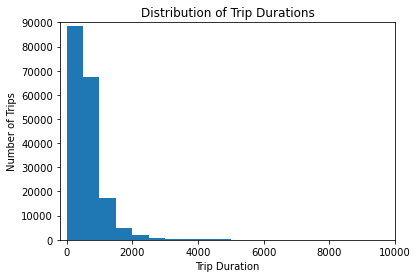

In [7]:
binsize = 500
bins = np.arange(0 , bikes['duration_sec'].max()+binsize , binsize)
plt.hist(data = bikes , x = "duration_sec" , bins = bins);
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration')
plt.ylabel('Number of Trips')
plt.axis([-200, 10000, 0, 90000]);

The plot above shows right skewed pattern, putting it on log scale.

<ipython-input-8-52fd4bee9542>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000]);


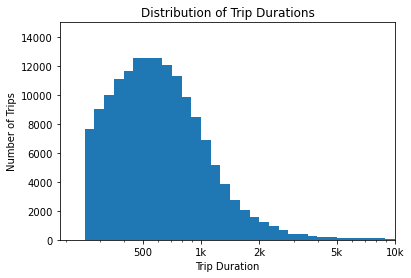

In [8]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data = bikes , x="duration_sec", bins = bins);
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 15000]);

Most of trips durations are below 2000 sec with high peak around 600 with count around 13000.

I will study other features user_type and member_gender.

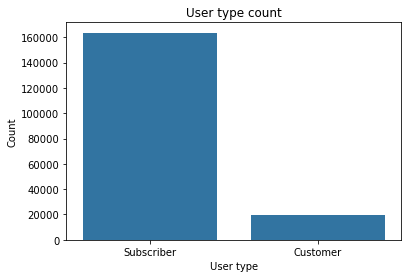

In [9]:
base_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'user_type', order = bikes['user_type'].value_counts().index ,color = base_color);
plt.title('User type count')
plt.xlabel('User type')
plt.ylabel('Count');

As shown in graph number of trips done by subscribers are more than customers, this can be a feature affects the trip duratoin.

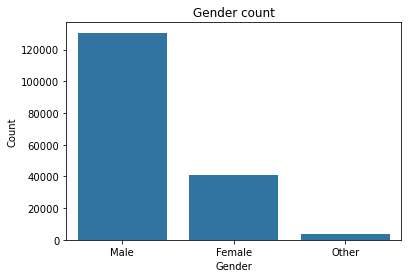

In [10]:
sb.countplot(data = bikes, x = 'member_gender', order = bikes['member_gender'].value_counts().index ,color = base_color);
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Count');

From the dataset we see that males have more entries other than female and other, further study to see the relationship between gender and trip duration.

Before investigating start_time and end_time I will convert it to datetime data type

In [11]:
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

In [12]:
bikes['start_day'] = bikes['start_time'].dt.day
bikes['start_day'].value_counts()

28    9829
20    9667
21    9536
19    9467
7     9234
22    9204
6     9057
11    8681
5     8486
12    8473
27    7715
15    7288
25    7033
14    6598
8     6356
1     6133
18    5647
4     5491
23    5451
26    5387
24    4497
17    4225
16    3993
10    3960
2     3231
13    3202
3     2841
9     2730
Name: start_day, dtype: int64

In [13]:
bikes['day_of_week'] = bikes['start_time'].dt.strftime('%A')
bikes['day_of_week'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day_of_week, dtype: int64

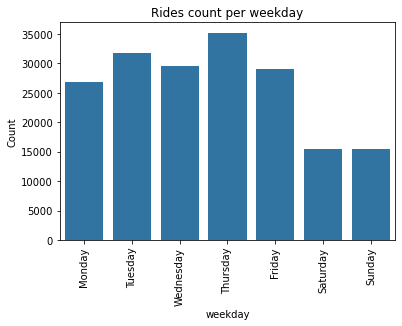

In [14]:
orders = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data = bikes, x = 'day_of_week', order = orders ,color = base_color);
plt.title('Rides count per weekday')
plt.xlabel('weekday')
plt.ylabel('Count')
plt.xticks(rotation = 90);

Thursday holds the biggest number of rides while weekend has the lowest number of rides, this can be an affecting feature toward trip duration.

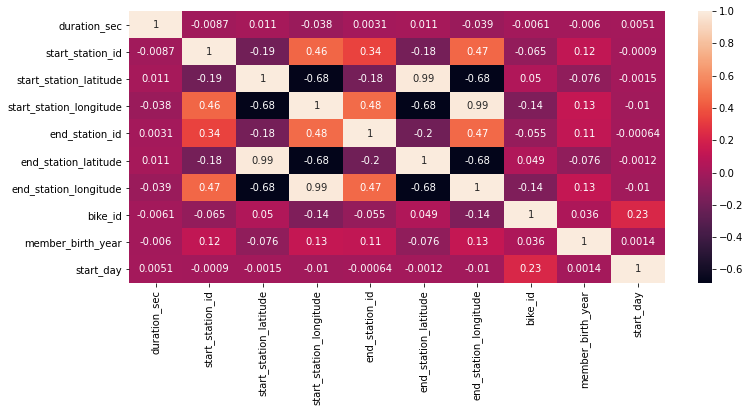

In [15]:
plt.figure(figsize=[12,5])
sb.heatmap(bikes.corr(), annot=True)
plt.show()

From the heat map I decided to drop non crutual features from the dataset (staion_id {start and end}, staion_latitude {start and end}. 

In [16]:
#creating new dataframe excluding un interesting features
bikes_copy = bikes
bikes_copy.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

I will drop the null values from member_gender column to eliminate its noise on my results.

In [17]:
#Dropping null values in member_gender
bikes.dropna(subset=['member_gender'] , inplace=True)

In [18]:
bikes_copy.info()
#Confirmin the changes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   bike_id                  175147 non-null  int64         
 8   user_type                175147 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  175147 non-null  object        
 12  start_day       

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to dip and does not regain any more peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Changed the datatype of start_time and end_time to datatime to extract the weekdays and seperate into weekday and weekend.
Dropped all null values in member_gender.
Gender plot shows most of user are male, while weekday plot shows max trips made on Thursday with min on weekend.
User type plot shows most trip made by subscribers rather than customers.

## Bivariate Exploration

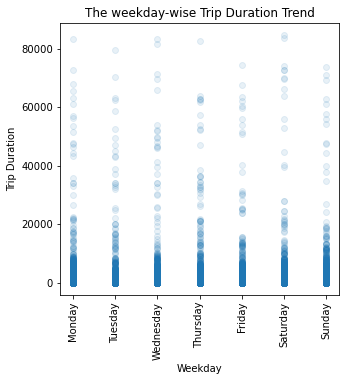

In [19]:
plt.figure(figsize = [5,5])
order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikes_copy['day_of_week'] = pd.Categorical(bikes_copy['day_of_week'], order)
bikes_copy.sort_values(by=['day_of_week'], inplace=True)
plt.scatter(data = bikes_copy , x = 'day_of_week' , y = 'duration_sec' ,alpha = 0.1 )
plt.title('The weekday-wise Trip Duration Trend')
plt.xlabel('Weekday')
plt.ylabel('Trip Duration')
plt.xticks(rotation=90);

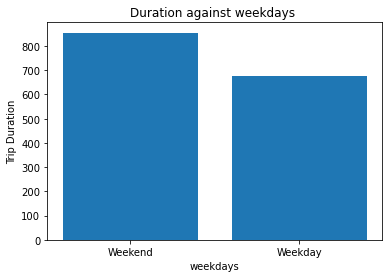

In [20]:
weekend = bikes_copy.query('day_of_week in ["Sunday","Saturday"]' ).duration_sec.mean ()
weekday = bikes_copy.query('day_of_week in ["Monday","Tuesday","Wednesday","Thursday","Friday"] ').duration_sec.mean()
plt.bar(['Weekend','Weekday'],[weekend,weekday] )
plt.title('Duration against weekdays ')
plt.xlabel('weekdays')
plt.ylabel('Trip Duration');

Studying the relation between trip duration and weekdays shows longest trips done over the weekend with few outliers on weekdays, Confriming our fisrt investigation weekend mean is higher than weekdays for the trip duration.

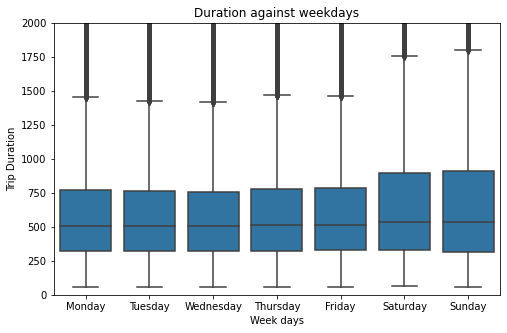

In [21]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = bikes_copy, x = 'day_of_week', y = 'duration_sec', order=orders,color = base_color)
plt.ylim([0, 2000])
plt.title('Duration against weekdays')
plt.xlabel('Week days')
plt.ylabel('Trip Duration');

More detailed plot showing longest trips done over the weekend with within range of 850-900 sec with few outliers and weekdays has shorted trips around 750 sec with outliers near 1400. 

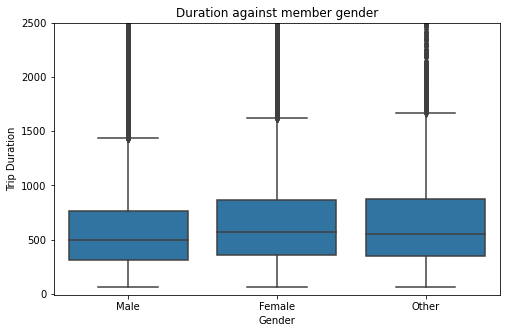

In [22]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = bikes_copy, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.title('Duration against member gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration');

Refering to above plot we see than gender is affecting the trip duration with males on shortest trip duration while other has the longest trips duration.

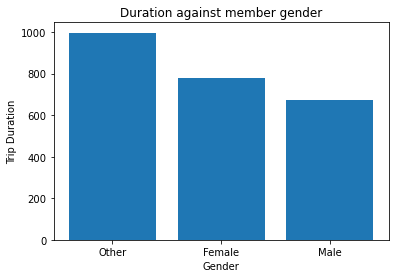

In [23]:
male = bikes_copy.query('member_gender in ["Male"]' ).duration_sec.mean ()
female = bikes_copy.query('member_gender in ["Female"] ').duration_sec.mean()
other = bikes_copy.query('member_gender in ["Other"] ').duration_sec.mean()
plt.bar(['Other','Female','Male'],[other,female,male] )
plt.title('Duration against member gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration');

Using the trip duration mean for each gender we see other has the longest trip duration.

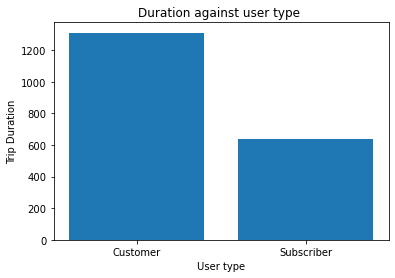

In [24]:
sub = bikes_copy.query('user_type in ["Subscriber"]' ).duration_sec.mean ()
cus = bikes_copy.query('user_type in ["Customer"] ').duration_sec.mean()
plt.bar(['Customer','Subscriber'],[cus,sub] )
plt.title('Duration against user type ')
plt.xlabel('User type')
plt.ylabel('Trip Duration');

Customers tend to have longer trips than subscribers proving that user type affects the trip duration.

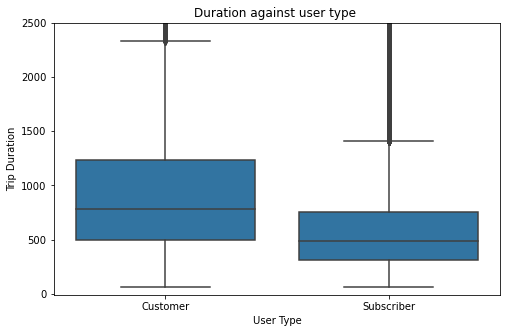

In [25]:
plt.figure(figsize = [8, 5])
sb.boxplot(data = bikes_copy, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Trip Duration')
plt.title('Duration against user type ');

Illustrating the relation between user type and trip duration confirming customer user type has longer trip duration than subscriber user type

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From above figures trip duration is highly dependent on user type and which day of the week as trips done during weekend has higher duration versus trips done during weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From gender males has higher count but other has highest trip duration followed by females. 
User type shows higher volume count for subscribers but customers made longer trips.

## Multivariate Exploration

I will measure gender and user type play into the relationship between trip duration and weekdays.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


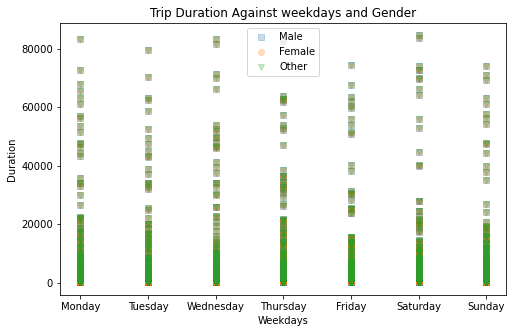

In [26]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]
plt.figure(figsize = [8, 5])
for gender, marker in gender_markers:
    df_gender = bikes_copy[bikes_copy['member_gender'] == gender]
    plt.scatter((bikes_copy['day_of_week']), bikes_copy['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.xlabel('Weekdays')
plt.ylabel('Duration')
plt.title('Trip Duration Against weekdays and Gender')
plt.show()

The graph above can't be decipted correctly. non informative data can be aquired.
next I will split into 3 graphs to have a better view of the data.

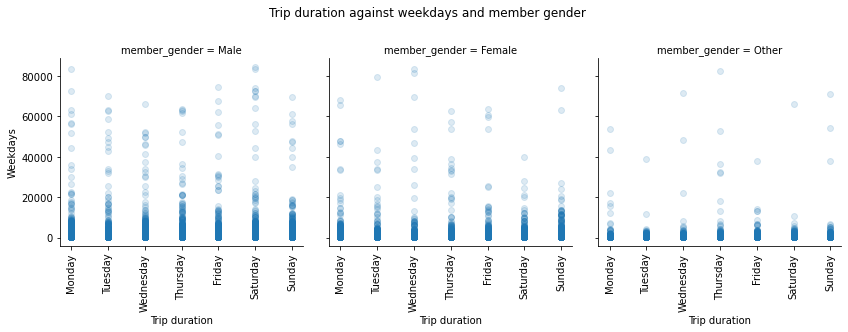

In [27]:
g = sb.FacetGrid(data = bikes_copy, col = 'member_gender',height=4)
g.map(plt.scatter, 'day_of_week', 'duration_sec', alpha=0.15)
g.set_xlabels('Trip duration')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Trip duration against weekdays and member gender')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.set_ylabels('Weekdays');

Next I will study the affect of user type and weekday on the trip duration.

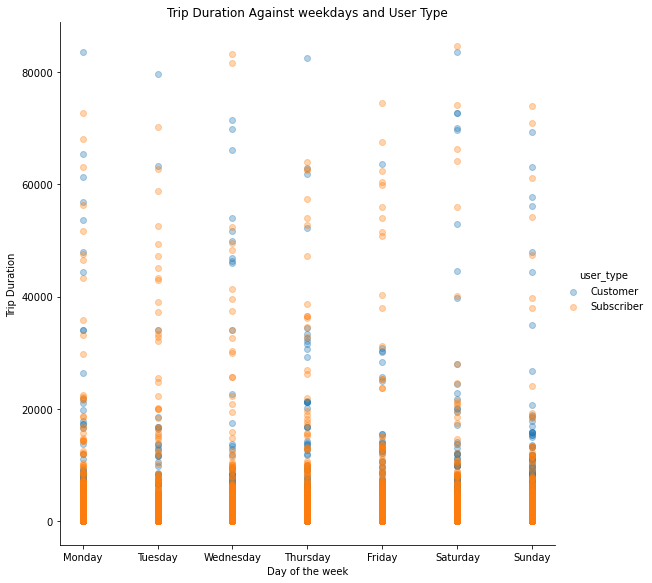

In [28]:
g = sb.FacetGrid(data =  bikes_copy, hue = 'user_type', height = 8)
g.map(plt.scatter, 'day_of_week','duration_sec', alpha = 1/3)
g.add_legend()
#plt.ylim([-10, 20000])
plt.title('Trip Duration Against weekdays and User Type')
plt.xlabel('Day of the week')
plt.ylabel('Trip Duration');

The graph shows subscriber user has longer trips throuhg out the week, customers has shorter trips duration the weekdays with almsot similar durations as subsriber over the weekend.
Next I will seperate user type into two graphs to have better view of the data.

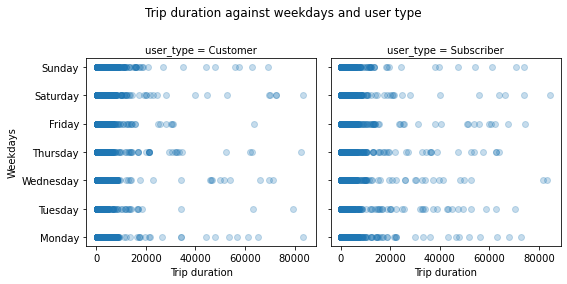

In [29]:
g = sb.FacetGrid(data = bikes_copy, col = 'user_type',height=4 , despine=False)
g.map(plt.scatter, 'duration_sec', 'day_of_week', alpha=0.25)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Trip duration against weekdays and user type')
g.set_xlabels('Trip duration')
g.set_ylabels('Weekdays');

Confirming our fisrt findings subscriber user type tend to have longer trip duration through out the week, while customer user type has shorter trip duration.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From above plots I concluded that though the number trips is higher for male but percentage is higher for women and other, also customer user type has higher number of trips but longer trip duration for subscribers

### Were there any interesting or surprising interactions between features?

Despite customers user type and male gender hold higher number of trips they still hold lowest trip duration,
Number of trips done by other and female is less than males but they are longer in duration same conclusion for Subscriber 
user type with less number of trips than customer user type but longer trip duration.
trips done over the weekend tend to be longer than trips done during the week.

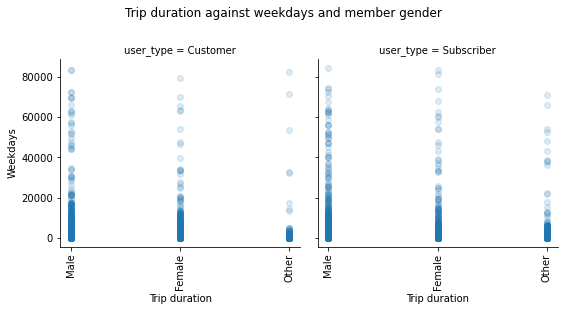

In [31]:
g = sb.FacetGrid(data = bikes_copy, col = 'user_type',height=4)
g.map(plt.scatter, 'member_gender', 'duration_sec', alpha=0.15)
g.set_xlabels('Trip duration')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Trip duration against weekdays and member gender')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.set_ylabels('Weekdays');